# Distribution of $s$ Errors

## Querying the Microlensing Table from Exoplanet Archive

In [ ]:
%pip install astroquery

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.1 MB 20.2 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 26.2 MB/s eta 0:00:00

   -- -------------------------------------  1/18 [urllib3]
   -- -------------------------------------  1/18 [urllib3]
   -- -------------------------------------  1/18 [urllib3]
   ---- -----------------------------------  2/18 [typing-extensions]
   ------ ---------------------------------  3/18 [soupsieve]
   -------- -------------------------------  4/18 [pywin32-ctypes]
   -------- -------------------------------  4/18 [pywin32-ctypes]
   ----------- ----------------------------  5/18 [more-itertools]
   ------------- ------------------

In [1]:
# Import required libraries
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,htmllink,ml_modeldef,ml_sepinsnorp,ml_sepinsnorperr1,ml_sepinsnorperr2,ml_description,ml_modelchisq")
ML_df = query.to_pandas()

# Filter out rows with missing values
#exoplanet_df_clean = ML_df.dropna(subset=['pl_bmassj', 'pl_orbsmax']).copy()

# Makes Fractional Uncertainty and tries Chi^2 for each point in data
ML_df["fractional_uncertainty"] = np.sqrt(ML_df["ml_sepinsnorperr1"]**2 + ML_df["ml_sepinsnorperr2"]**2) / ML_df["ml_sepinsnorp"]
ML_df["L"] = np.exp(-1/2 * ML_df["ml_modelchisq"])
ML_df["P_tot"] = ML_df.groupby("pl_name")["L"].transform("sum")
ML_df["P"] = ML_df["L"] / ML_df["P_tot"]

# ML_df.groupby("pl_name").head(10)


,pl_name,htmllink,ml_modeldef,ml_sepinsnorp,ml_sepinsnorperr1,ml_sepinsnorperr2,ml_description,ml_modelchisq,fractional_uncertainty,L,P_tot,P
0,KMT-2022-BLG-1790L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,0.9755,0.0070,-0.0070,Outer (default),5716.400,0.010148,0.000000e+00,0.000000e+00,NaN
1,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.5400,0.0410,-0.0410,Inner (default),665.800,0.037651,2.650739e-145,5.049227e-145,0.524979
2,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.1423,0.0078,-0.0078,Inner (default),2373.300,0.009657,0.000000e+00,0.000000e+00,NaN
3,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.7230,0.0170,-0.0170,Outer,666.000,0.033253,2.398488e-145,5.049227e-145,0.475021
4,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.8946,0.0065,-0.0065,Outer,2374.000,0.010275,0.000000e+00,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
789,OGLE-2018-BLG-1185L b,<a refstr=KONDO_ET_AL__2021 href=https://ui.ad...,0,0.9630,0.0010,-0.0010,2L1S close model with Spitzer parallax constra...,23221.473,0.001469,0.000000e+00,0.000000e+00,NaN
790,OGLE-2019-BLG-0679L b,<a refstr=JUNG_ET_AL__2023 href=https://ui.ads...,1,2.2160,0.0230,-0.0230,Standard (default),4194.400,0.014678,0.000000e+00,0.000000e+00,NaN
791,KMT-2018-BLG-1996L b,<a refstr=HAN_ET_AL__2021 href=https://ui.adsa...,1,1.4550,0.0910,-0.0910,Wide model chosen as default due to lower chi-...,979.600,0.088449,1.916738e-213,1.916806e-213,0.999965
792,MOA-bin-29 b,<a refstr=KONDO_ET_AL__2019 href=https://ui.ad...,0,0.5370,0.0240,-0.0240,close1 model; lens magnitudes derived from Bay...,13.240,0.063205,1.333431e-03,9.365968e-02,0.014237


In [15]:
# Creates Relative Chi^2 for Histogram
ML_df["delta_chi2"] = ML_df["ml_modelchisq"] - ML_df.groupby("pl_name")["ml_modelchisq"].transform("min")
ML_df["L"] = np.exp(-1/2 * ML_df["delta_chi2"])
ML_df["P_tot"] = ML_df.groupby("pl_name")["L"].transform("sum")
ML_df["P"] = ML_df["L"] / ML_df["P_tot"]

ML_df.groupby("pl_name").head(10)

,pl_name,htmllink,ml_modeldef,ml_sepinsnorp,ml_sepinsnorperr1,ml_sepinsnorperr2,ml_description,ml_modelchisq,fractional_uncertainty,L,P_tot,P,delta_chi2,event_id,P_event_tot
0,KMT-2022-BLG-1790L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,0.9755,0.0070,-0.0070,Outer (default),5716.400,0.010148,1.000000,1.000000,1.000000,0.00,KMT-2022-BLG-1790L,1.0
1,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.5400,0.0410,-0.0410,Inner (default),665.800,0.037651,1.000000,1.904837,0.524979,0.00,KMT-2017-BLG-2197L,1.0
2,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.1423,0.0078,-0.0078,Inner (default),2373.300,0.009657,1.000000,1.704688,0.586618,0.00,KMT-2022-BLG-2076L,1.0
3,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.7230,0.0170,-0.0170,Outer,666.000,0.033253,0.904837,1.904837,0.475021,0.20,KMT-2017-BLG-2197L,1.0
4,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.8946,0.0065,-0.0065,Outer,2374.000,0.010275,0.704688,1.704688,0.413382,0.70,KMT-2022-BLG-2076L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,OGLE-2018-BLG-1185L b,<a refstr=KONDO_ET_AL__2021 href=https://ui.ad...,0,0.9630,0.0010,-0.0010,2L1S close model with Spitzer parallax constra...,23221.473,0.001469,1.000000,2.000000,0.500000,0.00,OGLE-2018-BLG-1185L,1.0
790,OGLE-2019-BLG-0679L b,<a refstr=JUNG_ET_AL__2023 href=https://ui.ads...,1,2.2160,0.0230,-0.0230,Standard (default),4194.400,0.014678,1.000000,1.000000,1.000000,0.00,OGLE-2019-BLG-0679L,1.0
791,KMT-2018-BLG-1996L b,<a refstr=HAN_ET_AL__2021 href=https://ui.adsa...,1,1.4550,0.0910,-0.0910,Wide model chosen as default due to lower chi-...,979.600,0.088449,1.000000,1.000035,0.999965,0.00,KMT-2018-BLG-1996L,1.0
792,MOA-bin-29 b,<a refstr=KONDO_ET_AL__2019 href=https://ui.ad...,0,0.5370,0.0240,-0.0240,close1 model; lens magnitudes derived from Bay...,13.240,0.063205,0.021386,1.502173,0.014237,7.69,MOA-bin-29,1.0


In [4]:
# Create two new columns: One for star id and one for the event total probability
ML_df["event_id"] = ML_df["pl_name"].str.split(" ").str[0]
ML_df["P_event_tot"] = ML_df.groupby("event_id")["P"].transform("sum")
# ML_df.groupby("event_id").head(10)

In [ ]:
ML_df_copy = ML_df.copy()
print(len(ML_df_copy))
print(ML_df_copy["event_id"][ML_df_copy["P_event_tot"]>= 2].unique())


# If P_event_tot is greater than 1.0000001, then we must find where they are and place them in an array for checks
array = ML_df_copy["event_id"][ML_df_copy["P_event_tot"]>= 2].unique()

# ML_df["event_id"].loc[ML_df["P_event_tot"] >= 2]
# ML_df["delta_chi2"].loc[ML_df["P_event_tot"]>= 2]

for name in array:
    label = ML_df_copy[ML_df_copy["event_id"] == name].index[0]
    position = ML_df_copy.index.get_loc(label)
    ML_df_copy = ML_df_copy.drop([position])
    # print(position)

print(ML_df_copy["event_id"][ML_df_copy["P_event_tot"]>= 2].unique())
print()
print(len(ML_df_copy))

794
['OGLE-2019-BLG-0468L' 'OGLE-2014-BLG-1722L' 'OGLE-2018-BLG-1011L'
 'KMT-2020-BLG-0414L' 'KMT-2021-BLG-1077L' 'OGLE-2006-BLG-109L'
 'OGLE-2012-BLG-0026L']
['OGLE-2014-BLG-1722L' 'OGLE-2018-BLG-1011L' 'OGLE-2019-BLG-0468L'
 'KMT-2020-BLG-0414L' 'KMT-2021-BLG-1077L' 'OGLE-2006-BLG-109L'
 'OGLE-2012-BLG-0026L']
787


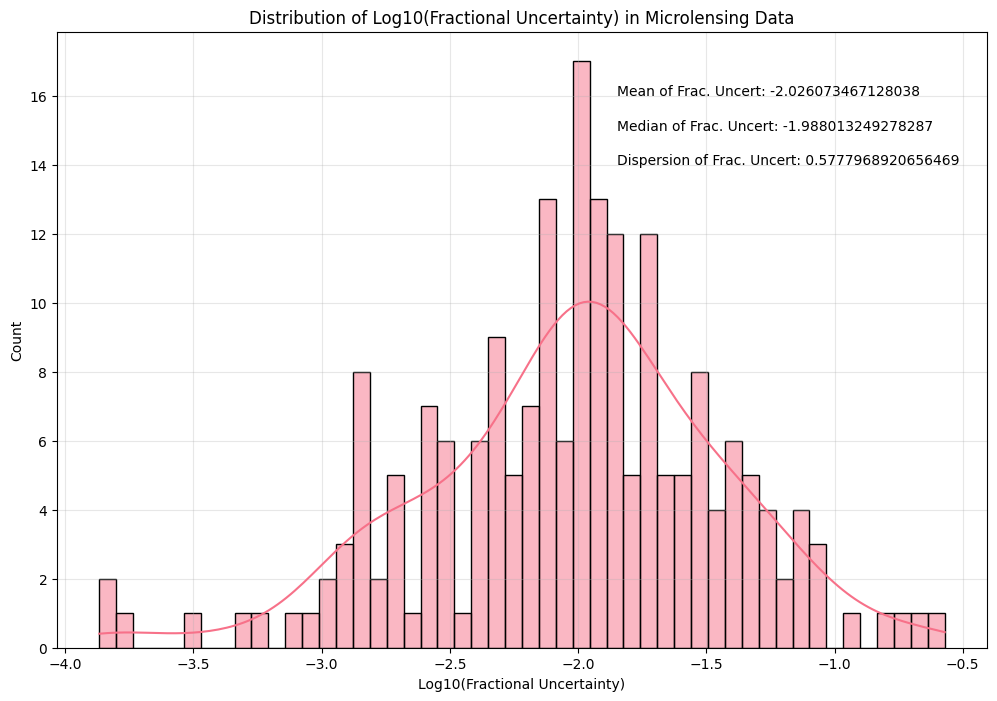

In [ ]:
# Alternative with log-transformed data
plt.figure(figsize=(12, 8))
sns.histplot(data=np.log10(ML_df['fractional_uncertainty'][ML_df["ml_modeldef"] == 1]), bins=50, kde=True)
plt.xlabel('Log10(Fractional Uncertainty)')
plt.ylabel('Count')
plt.title('Distribution of Log10(Fractional Uncertainty) in Microlensing Data')
plt.text(-1.85, 16, s = f"Mean of Frac. Uncert: {np.mean(np.log10(ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1]))}")
plt.text(-1.85, 15, s = f"Median of Frac. Uncert: {np.nanmedian(np.log10(ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1]))}")
plt.text(-1.85, 14, s = f"Dispersion of Frac. Uncert: {np.std(np.log10(ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1]))}")
plt.grid(True, alpha=0.3)
plt.show()

**For a not quick and dirty version:**
* make a new column for the weights
* make sure the sum of the weights for each planet add up to 1
* calculate the relative weights using chi2
   - L_i = -1/2 * chi^2
   - P_i = L_i/sum(L)
* weight the histogram by these probabilities

> Note: we can ignore the fact that some of the degenerate models might not be single lenses, because they are included in our probability calculations but they won't have and s to get included in the histogram.

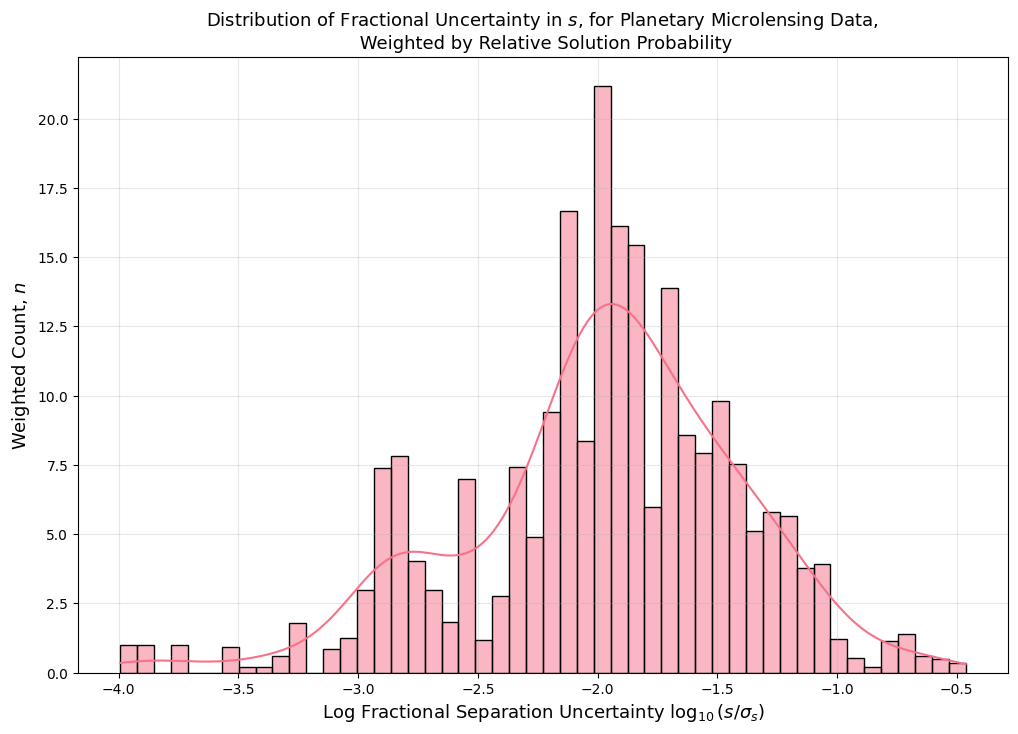

In [ ]:
# Alternative with log-transformed data
plt.figure(figsize=(12, 8))
sns.histplot(x=(np.log10(ML_df['fractional_uncertainty'])), bins=50, kde=True, weights= ML_df["P"])
plt.xlabel(r'Log Fractional Separation Uncertainty $\log_{10}(s/\sigma_s)$', fontsize = 13)
plt.ylabel(r'Weighted Count, $n$', fontsize = 13)
plt.title('Distribution of Fractional Uncertainty in $s$, for Planetary Microlensing Data, \n Weighted by Relative Solution Probability', fontsize = 13)
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
print(f"Mean of Frac. Uncert: {np.mean(np.log10(ML_df["fractional_uncertainty"][ML_df["P"].isna()]))}")
print(f"Median of Frac. Uncert: {np.nanmedian(np.log10(ML_df["fractional_uncertainty"][ML_df["P"].isna()]))}")
print(f"Dispersion of Frac. Uncert: {np.std(np.log10(ML_df["fractional_uncertainty"][ML_df["P"].isna()]))}")

Mean of Frac. Uncert: -1.953185986831231
Median of Frac. Uncert: -1.9705286948927851
Dispersion of Frac. Uncert: 0.6541749225564654
